In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functools
import json
from collections import Counter

In [12]:
def importing_json_files(file_wf):
    f_wf = open(file_wf) #informations for nf
    # returns JSON object as
    # a dictionary
    wf = json.load(f_wf)
    f_wf.close
    return wf

#importing the wf and auth dict (github info)
dict_nf = importing_json_files('../json/wf_new_crawl_nextflow.json')
auth_nf = importing_json_files('../json/author_clem_nf.json')

#import processes dictionnaries
with open('/home/marinedjaffardjy/Documents/Code/Similarite_process/json/nf_proc_tool_shell.json') as f:
    nf_proc = json.load(f)

In [27]:
wf_uniques = list(set([el["owner"]+"__"+el["wf_orig"] for el in nf_proc]))
print(len(wf_uniques))

1186


In [13]:
tools_all_occ=[]
for el in nf_proc:
    tools_all_occ+=el["tools"]
#unique tools
tools_unique=list(set(tools_all_occ))
print(len(tools_unique))
#all tool occurences
tools_counter=Counter(tools_all_occ)

615


In [14]:
patterns=[tuple(el["tools"]) for el in nf_proc]
patterns_unique=list(set(patterns))
patterns_counter=Counter(patterns)
print(len(patterns_unique))

1035


In [15]:
usage_and_patterns=[]
for tool in tools_unique:
    nb_patterns=0
    for patt in patterns_unique:
        if(tool in patt):
            nb_patterns+=1
    usage_and_patterns.append({"tool":tool,
                              "usage_tool":tools_counter[tool],
                              "nb_patterns":nb_patterns})

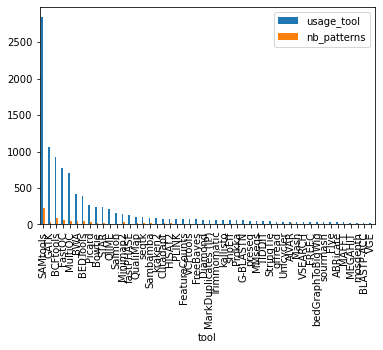

In [16]:
usage_and_patterns_df=pd.DataFrame(usage_and_patterns)
usage_and_patterns_df=usage_and_patterns_df.sort_values(by="usage_tool",ascending=False)
fig = usage_and_patterns_df.head(50).plot(x='tool',y=['usage_tool','nb_patterns'],kind="bar")

In [17]:
print(usage_and_patterns_df.head(10))

         tool  usage_tool  nb_patterns
307  SAMtools        2841          224
304      GATK        1067           36
344  BCFtools         929           84
521    FastQC         770           56
197   MultiQC         707           51
413       BWA         412           46
366  BEDTools         384           49
150    Picard         269           36
62     Bowtie         243           21
252      STAR         234           21


<AxesSubplot:xlabel='tool'>

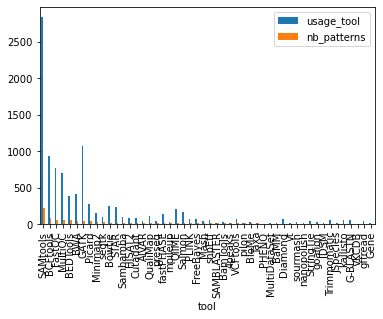

In [18]:
usage_and_patterns_df=usage_and_patterns_df.sort_values(by="nb_patterns",ascending=False)
usage_and_patterns_df.head(50).plot(x='tool',y=['usage_tool','nb_patterns'],kind="bar")

In [19]:
print(usage_and_patterns_df.head(10))

         tool  usage_tool  nb_patterns
307  SAMtools        2841          224
344  BCFtools         929           84
521    FastQC         770           56
197   MultiQC         707           51
366  BEDTools         384           49
413       BWA         412           46
304      GATK        1067           36
150    Picard         269           36
27   Minimap2         149           28
80      seqtk          96           24


In [20]:
nf_proc[0].keys()

dict_keys(['name_process', 'string_process', 'nb_lignes_process', 'string_script', 'nb_lignes_script', 'language_script', 'tools', 'tools_url', 'tools_dico', 'inputs', 'nb_inputs', 'outputs', 'nb_outputs', 'name_workflow', 'directive', 'when', 'stub', 'code', 'shell', 'wf_orig', 'name', 'file', 'owner', 'shell_modif'])

In [25]:
wf_usage=[]
for tool in tools_unique:
    wfs=[]
    for proc in nf_proc:
        if(tool in proc["tools"]):
            wfs.append(proc["owner"]+"__"+proc["wf_orig"])
    wfs=list(set(wfs))
    wf_usage.append({"tool":tool,
                    "nb_wf":len(wfs)})
df_wf_usage=pd.DataFrame(wf_usage).sort_values(by="nb_wf",ascending=False)


In [26]:
df_wf_usage.head(10)

,tool,nb_wf
307,SAMtools,532
521,FastQC,520
197,MultiQC,492
413,BWA,192
344,BCFtools,163
366,BEDTools,143
304,GATK,124
252,STAR,115
62,Bowtie,114
150,Picard,110
